Install Vertex AI SDK and other required Packages

In [ ]:
%pip install --upgrade  --user --quiet google-cloud-aiplatform

### Restart Runtime

To use the newly installed packages in this Jupyter runtime, you must restart the runtime. You can do this by running the cell below, which restarts the current kernel.

The restart might take a minute or longer. After it's restarted, continue to the next step.

In [1]:
import IPython

app = IPython.Application.instance()
app.kernel.do_shutdown(True)

{'status': 'ok', 'restart': True}

### Authenticate your Notebook Environment (Colab Only)

If you're running this notebook on Google Colab, run the cell below to authenticate your environment.

**NOTE:** The Gmail email address you use to authenticate this lesson colab must be the same as the one you used to set up your Google Cloud account and your Project.

In [1]:
import sys

if "google.colab" in sys.modules:
    from google.colab import auth
    # Attempt to authenticate the user
    auth.authenticate_user()

    # If authentication fails, provide guidance to the user
    import google.auth
    try:
        credentials, project_id = google.auth.default()
    except google.auth.exceptions.DefaultCredentialsError:
        print("Credential propagation failed. Please ensure you have:")
        print("1. A Google Cloud project created and linked to this Colab notebook.")
        print("2. Run the authentication cell: `auth.authenticate_user()`")
        print("3. If using a service account, set the GOOGLE_APPLICATION_CREDENTIALS environment variable.")

### Set Google Cloud Project Information and Initialize Vertex AI SDK

**Add _your_ Project ID below**, which you created while following the [How to Set Up your Google Cloud Account](https://learn.deeplearning.ai/courses/large-multimodal-model-prompting-with-gemini/lesson/9/how-to-set-up-your-google-cloud-account-|-try-it-out-yourself-[optional]) instructions. If your `Project ID` was `dlai-shortcourse-on-gemini`, then you can run the cell below as it is. Otherwise, be sure to change it.

You can also look up your Project ID in your [Project Dashboard](https://console.cloud.google.com/projectselector2/home/dashboard).

In [ ]:
PROJECT_ID = "{Your PRoject ID}"  # @param {type:"string"}
LOCATION = "us-central1"  # @param {type:"string"}


import vertexai

vertexai.init(project=PROJECT_ID, location=LOCATION)

### Utils Functions and Images

**Important Note:**

If using Google Colab, all the
```Python
from utils import ...
```

functions and all required images are readily accessible in the notebook. Execute the following cells to proceed.


In [7]:
import typing
import IPython.display
from PIL import Image as PIL_Image
from PIL import ImageOps as PIL_ImageOps

from vertexai.generative_models import (
    GenerationConfig,
    Image,
)

def gemini(prompt, model):
    responses = model.generate_content(prompt,
                                     stream=True)

    response_text = ""
    for response in responses:
        response_text += response.text

    return response_text

def display_images(
    images: typing.Iterable[Image],
    max_width: int = 600,
    max_height: int = 350,
) -> None:
    for image in images:
        pil_image = typing.cast(PIL_Image.Image, image._pil_image)
        if pil_image.mode != "RGB":
            # RGB is supported by all Jupyter environments (e.g. RGBA is not yet)
            pil_image = pil_image.convert("RGB")
        image_width, image_height = pil_image.size
        if max_width < image_width or max_height < image_height:
            # Resize to display a smaller notebook image
            pil_image = PIL_ImageOps.contain(pil_image, (max_width, max_height))
        IPython.display.display(pil_image)

def print_multimodal_prompt(contents: list):
    """
    Given contents that would be sent to Gemini,
    output the full multimodal prompt for ease of readability.
    """
    for content in contents:
        if isinstance(content, Image):
            display_images([content])
        elif isinstance(content, Part):
            url = get_url_from_gcs(content.file_data.file_uri)
            IPython.display.display(load_image_from_url(url))
        else:
            print(content)

def gemini_vision(contents_image, model):

    responses = model.generate_content(
        contents_image,
        stream=True)

    response_text = ""
    for response in responses:
        response_text += response.text
    return response_text

def gemini_vision_parameters(contents_image, model, config):

    responses = model.generate_content(
        contents=contents_image,
        generation_config=config,
        stream=True
    )

    response_text = ""
    for response in responses:
        response_text += response.text

    return response_text

In [ ]:
# download images from bucket
! gsutil cp "gs://lmm-prompting-with-gemini-bucket/Akadas.jpeg" ./Akadas.jpeg
! gsutil cp "gs://lmm-prompting-with-gemini-bucket/Prayajraj kumbh map 1.PNG" ./Prayajraj kumbh map 1.PNG
! gsutil cp "gs://lmm-prompting-with-gemini-bucket/maha-kumb-mela-maps-with-complete-details-sector-wise-prayagraj-updates.png" ./maha-kumb-mela-maps-with-complete-details-sector-wise-prayagraj-updates.png

In [8]:
from vertexai.generative_models import GenerativeModel

In [9]:
model = GenerativeModel("gemini-1.5-pro-002")

In [9]:
# from utils import gemini

In [46]:
gemini("what is a multimodal modal?",model=model)

"A multimodal model is a machine learning model designed to process and relate information from multiple modalities.  A modality refers to a type of data or sensory input, such as text, images, audio, video, sensor data, etc.  Multimodal models aim to integrate and understand these different modalities jointly, leading to a more comprehensive and nuanced understanding compared to processing each modality in isolation.\n\nHere's a breakdown:\n\n* **Single Modal Model:** Deals with only one type of data. For example, a model that classifies images based on their content is a single modal (image) model.  Similarly, a sentiment analysis model working solely on text is a single modal (text) model.\n\n* **Multimodal Model:**  Handles and integrates multiple modalities. For example, a model that generates image captions takes both an image (visual modality) and generates text (textual modality).  Another example is a model diagnosing diseases that takes in medical images, patient history (tex

In [4]:
from vertexai.generative_models import(
    GenerativeModel, Image, Part)


In [10]:
multimodal_model = GenerativeModel("gemini-1.5-pro-002")

In [27]:
image = Image.load_from_file("maha-kumb-mela-maps-with-complete-details-sector-wise-prayagraj-updates.png")

In [25]:
prompt_1="please describe what is in this image?"

In [36]:
prompt_2="list me all the sectors described in the image and format it in json format"

In [34]:
prompt_contents = [image, prompt_1, prompt_2]

*******prompt**********


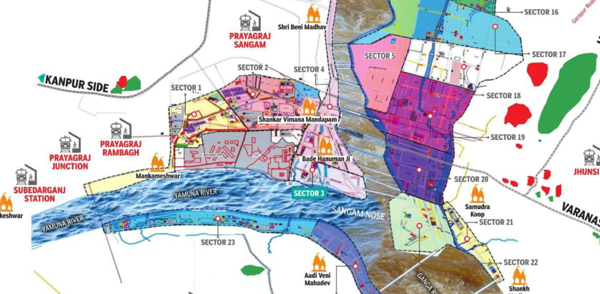

please describe what is in this image?
list me all the sectors described in the image and format it in bullet points line after the other


In [35]:
print("*******prompt**********")
print_multimodal_prompt(prompt_contents)

In [37]:
gemini_vision(prompt_contents,multimodal_model)

'The image appears to be a map of Prayagraj (formerly Allahabad), India, highlighting different sectors and points of interest, especially those related to the Kumbh Mela.  The map shows the confluence of the Yamuna and Ganga rivers (Sangam), various temples, and transportation hubs.\n\nHere are the sectors described in the image:\n\n* Sector 1\n* Sector 2\n* Sector 3\n* Sector 4\n* Sector 5\n* Sector 16\n* Sector 17\n* Sector 18\n* Sector 19\n* Sector 20\n* Sector 21\n* Sector 22\n* Sector 23'

In [ ]:
!gsutil cp "gs://lmm-prompting-with-gemini-bucket/snykreport.PNG" ./snykreport.png

In [40]:
image_snyk = Image.load_from_file("snykreport.png")

In [42]:
prompt_snyk_1 = "please explain what is in the image in detail"

In [43]:
prompt_contents_1 = [image_snyk,prompt_snyk_1]


In [ ]:
gemini_vision(prompt_contents_1,multimodal_model)

In [ ]:
!gsutil cp "gs://lmm-prompting-with-gemini-bucket/bowl-fruits.jpg" ./bowl-fruits.jpg
!gsutil cp "gs://lmm-prompting-with-gemini-bucket/price-list-fruits.jpg" ./price-list-fruits.jpg

1 - Let's make a Fruit Salad!

In [11]:
fruit = Image.load_from_file("./bowl-fruits.jpg")

In [12]:
prices = Image.load_from_file("./price-list-fruits.jpg")

In [13]:
images = [fruit, prices]

In [ ]:
print("-------images--------")
print_multimodal_prompt(images)

In [15]:
instruction_1 = """
I want to make a fruit salad with three bananas, 1 apples, \
two kiwi, and two orange. This is an image of my bowl \
of fruits:
"""

In [16]:
instruction_2 = "This is the price list for fruits at \
my supermarket:"

In [18]:
question = """
Please answer these questions:
- Describe which fruits and how many I have in my fruit bowl on \
the image?
- Given the fruits in my bowl on the image and the fruit salad \
recipe, what am I missing?
- Given the fruits I still need to buy, what \
would be the prices and total cost for these fruits?
"""

In [19]:
contents = [
    instruction_1,
    fruit,
    instruction_2,
    prices,
    question,
]

-------Prompt--------

I want to make a fruit salad with three bananas, 1 apples, two kiwi, and two orange. This is an image of my bowl of fruits:



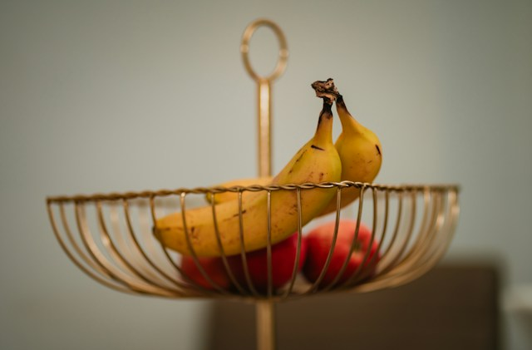

This is the price list for fruits at my supermarket:


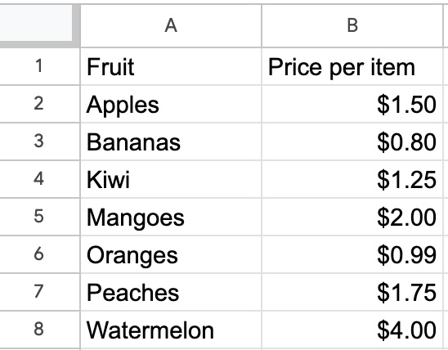


Please answer these questions:
- Describe which fruits and how many I have in my fruit bowl on the image?
- Given the fruits in my bowl on the image and the fruit salad recipe, what am I missing?
- Given the fruits I still need to buy, what would be the prices and total cost for these fruits?



In [20]:
print("-------Prompt--------")
print_multimodal_prompt(contents)

In [ ]:

response = gemini_vision(
            contents,
            multimodal_model)

print(response, end="")

2 - Your very own Interior Designer!

In [22]:
furniture_images_uri = [
    "./chair-1.jpg",
    "./chair-2.jpg",
    "./chair-3.jpg",
    "./chair-4.jpg",
]

In [24]:
!gsutil cp "gs://lmm-prompting-with-gemini-bucket/chair-1.jpg" ./chair-1.jpg
!gsutil cp "gs://lmm-prompting-with-gemini-bucket/chair-2.jpg" ./chair-2.jpg
!gsutil cp "gs://lmm-prompting-with-gemini-bucket/chair-3.jpg" ./chair-3.jpg
!gsutil cp "gs://lmm-prompting-with-gemini-bucket/chair-4.jpg" ./chair-4.jpg
!gsutil cp "gs://lmm-prompting-with-gemini-bucket/room.jpg" ./room.jpg


Copying gs://lmm-prompting-with-gemini-bucket/chair-1.jpg...
/ [1 files][  5.7 KiB/  5.7 KiB]                                                
Operation completed over 1 objects/5.7 KiB.                                      
Copying gs://lmm-prompting-with-gemini-bucket/chair-2.jpg...
/ [1 files][  6.2 KiB/  6.2 KiB]                                                
Operation completed over 1 objects/6.2 KiB.                                      
Copying gs://lmm-prompting-with-gemini-bucket/chair-3.jpg...
/ [1 files][  8.8 KiB/  8.8 KiB]                                                
Operation completed over 1 objects/8.8 KiB.                                      
Copying gs://lmm-prompting-with-gemini-bucket/chair-4.jpg...
/ [1 files][ 13.7 KiB/ 13.7 KiB]                                                
Operation completed over 1 objects/13.7 KiB.                                     
Copying gs://lmm-prompting-with-gemini-bucket/room.jpg...
/ [1 files][ 22.8 KiB/ 22.8 KiB]              

In [25]:
room_image = Image.load_from_file("./room.jpg")

In [26]:
furniture_images = [Image.load_from_file(uri)
                    for uri in furniture_images_uri]

In [27]:
images_2 = [room_image]

In [28]:
images_2.extend(furniture_images)

-------images--------


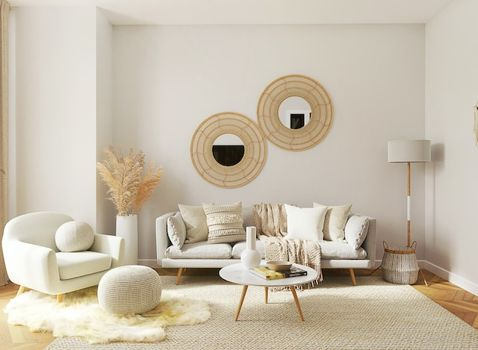

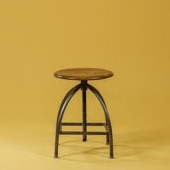

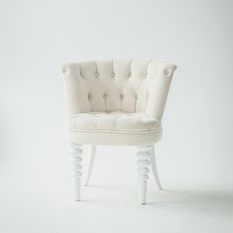

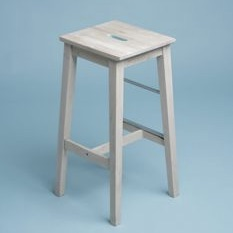

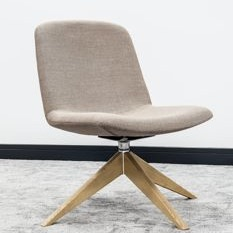

In [29]:
print("-------images--------")
print_multimodal_prompt(images_2)

In [30]:
recommendation_content = [
    "You are an interior designer.",
    "Consider the following chairs:",
    "chair 1:",
    furniture_images[0],
    "chair 2:",
    furniture_images[1],
    "chair 3:",
    furniture_images[2],
    "chair 4:",
    furniture_images[3],
    "room:",
    room_image,
    "For each chair, \
explain whether it would be appropriate for the \
style of the room:",
]

In [31]:
### Remember, you are using gemini-1.0-pro-vision-001
multimodal_model = GenerativeModel("gemini-1.5-pro-002")

print("\n-------Response--------\n")

response = gemini_vision(
            recommendation_content,
            multimodal_model)

print(response, end="")


-------Response--------

Here's my assessment of each chair's suitability for the room:

* **Chair 1 (Industrial Stool):**  This stool clashes with the room's aesthetic. The room has a soft, natural, and bohemian vibe. The industrial stool's metal and wood combination, while attractive in its own right, is too harsh and utilitarian for this setting. It would feel out of place amongst the textured textiles and light color palette.

* **Chair 2 (White Tufted Chair):** This chair could potentially work *if* the room leaned more towards a shabby chic or romantic bohemian style. However, as it stands, the chair is too ornate and formal for the relaxed, natural feel of the room. The white color works, but the tufting and barley twist legs are a bit too fussy.

* **Chair 3 (Tall Wooden Stool):**  Similar to the industrial stool, this one doesn't quite fit. While the light wood color aligns with the room's palette, its simple and utilitarian design doesn't blend with the softer, more decorati